In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

/home/gabriele/anaconda3/envs/acc-env/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
from pyACC.fits_wrapper import FitsManager 

In [4]:
from astropy.cosmology import LambdaCDM

In [5]:
fiducial_cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [6]:
redshifts=1.0

In [7]:
dc=fiducial_cosmo.comoving_distance(redshifts)

In [8]:
vipers_sample=FitsManager("/home/gabriele/astrocosmolib/VIPERS_W1_SPECTRO_PDR2.fits.gz")

2025-03-25 11:16:12.314090 :: FitsManager :: INFO :: FITS file opened correctly


In [9]:
data=vipers_sample.get_data(1)
alpha=data['ALPHA']
delta=data['DELTA']
redshifts=data['zspec']
zflg=data['zflg']

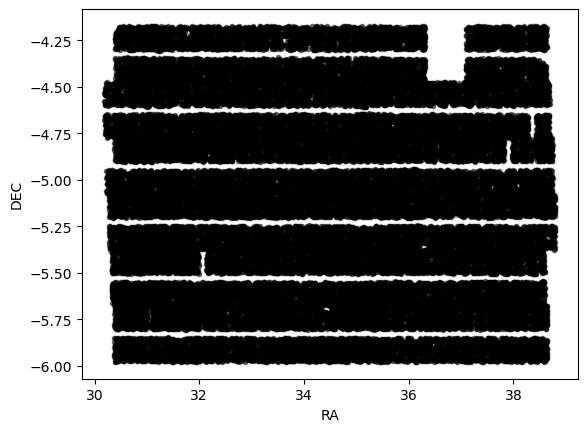

In [10]:
plt.plot(alpha, delta, 'k.', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [11]:
cut_zspec=np.where((redshifts>0.3)&(redshifts<1.5)&(zflg<=9))[0]

In [12]:
len(cut_zspec), len(redshifts)

(55398, 60528)

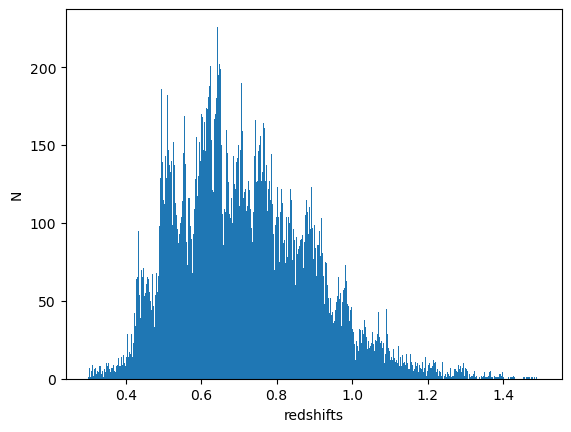

In [13]:
plt.hist(redshifts[cut_zspec], bins=1000)
plt.xlabel('redshifts')
plt.ylabel('N')
plt.show()

In [14]:
dc=fiducial_cosmo.comoving_distance(redshifts[cut_zspec])
x=dc*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
y=dc*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
z=dc*np.sin(np.radians(delta[cut_zspec]))

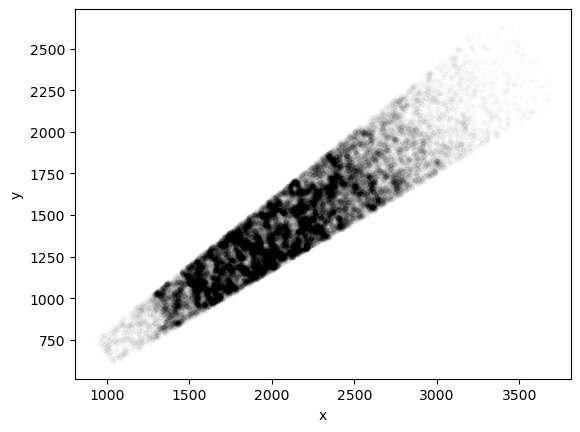

In [15]:
plt.plot(x, y, 'k.', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
fiducial_cosmo_2=LambdaCDM(H0=70, Om0=0.1, Ode0=0.1)
dc2=fiducial_cosmo_2.comoving_distance(redshifts[cut_zspec])
x2=dc2*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
y2=dc2*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
z2=dc2*np.sin(np.radians(delta[cut_zspec]))

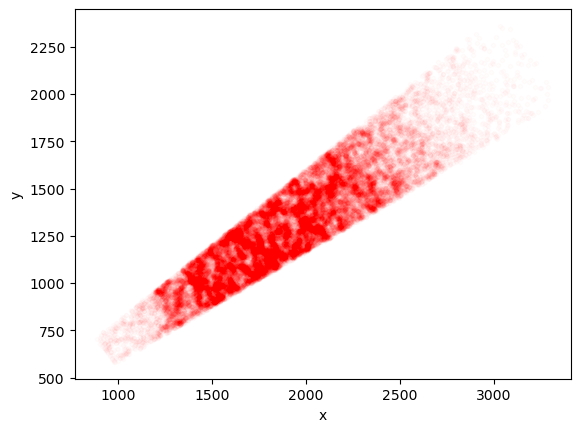

In [18]:
plt.plot(x2, y2, 'r.', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()